## Slices in yt-napari

In addition to sampling `region` objects, the `yt_napari` plugin can sample 2D slices normal to the `yt` dataset axes. To get started, initialize an empty `napari.Viewer`, load in a `yt` dataset and initialize our `yt_napari` `Scene`:

In [1]:
import napari
import yt
from yt_napari.viewer import Scene

In [2]:
viewer = napari.Viewer()

In [3]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2023-07-07 13:35:37,106 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2023-07-07 13:35:37,107 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2023-07-07 13:35:37,108 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-07 13:35:37,108 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-07-07 13:35:37,109 Parameters: cosmological_simulation   = 0


In [4]:
yt_scene = Scene()

The `add_slice` method will sample a slice normal to one of the dataset axes. The arguments are similar to `yt.SlicePlot`: 

In [5]:
yt_scene.add_slice(viewer, 
                   ds, 
                   'z', 
                   ('enzo', 'Density'), 
                   center = ds.domain_center,
                   resolution = (600, 600), 
                   width = ds.quan(25, 'kpc'),
                   height = ds.quan(25, 'kpc')                   
                   )

Parsing Hierarchy : 100%|█████████████████████████████████████████████████| 173/173 [00:00<00:00, 17558.31it/s]
yt : [INFO     ] 2023-07-07 13:35:37,143 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-07-07 13:35:38,527 Making a fixed resolution buffer of (('enzo', 'Density')) 600 by 600


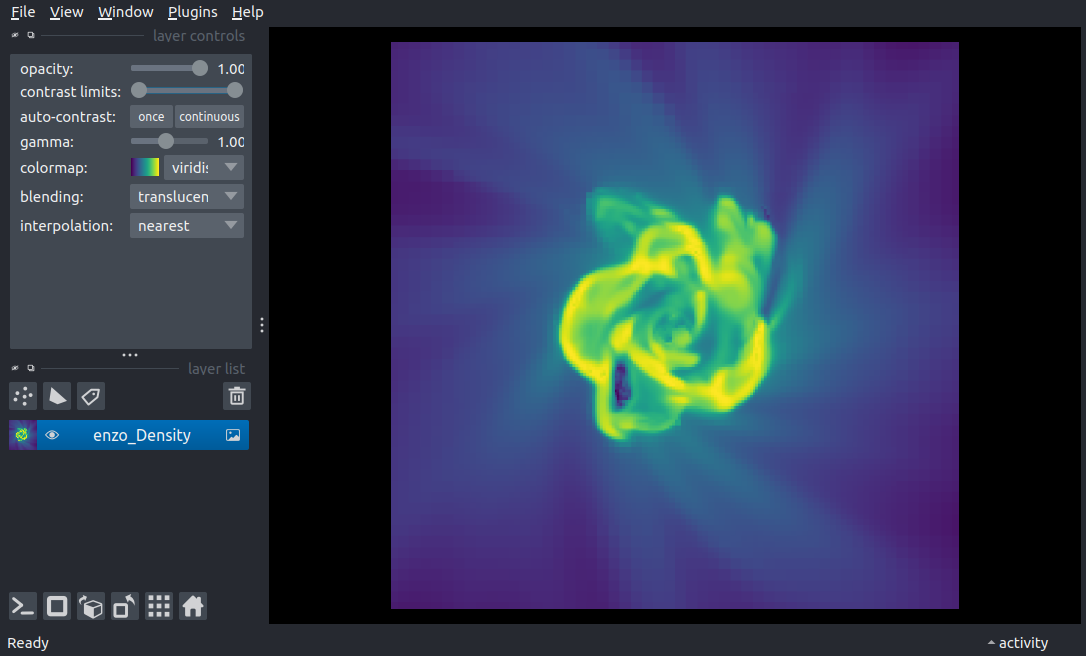

In [6]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

## useful applications 

For simple visualizations, it's likely easier to simply use the standard `yt` plotting API (`yt.SlicePlot`), but there are a number of uses for slices in napari. 

### field composites 

`yt_napari` makes it easy to create composite images with different fields:

In [7]:
viewer.layers.clear() # first clear existing layers

In [8]:
yt_scene.add_slice(viewer, 
                   ds, 
                   'z', 
                   ('enzo', 'Density'), 
                   center = ds.domain_center,
                   resolution = (600, 600), 
                   width = ds.quan(25, 'kpc'),
                   height = ds.quan(25, 'kpc'),
                   colormap='red',
                   contrast_limits=(3.4, 6.4)
                   )

yt_scene.add_slice(viewer, 
                   ds, 
                   'z', 
                   ('enzo', 'Temperature'), 
                   center = ds.domain_center,
                   resolution = (600, 600), 
                   width = ds.quan(25, 'kpc'),
                   height = ds.quan(25, 'kpc'),                   
                   colormap = 'yellow',
                   contrast_limits=(4., 6.),
                   blending='additive',
                   )

yt : [INFO     ] 2023-07-07 13:35:38,991 Making a fixed resolution buffer of (('enzo', 'Temperature')) 600 by 600


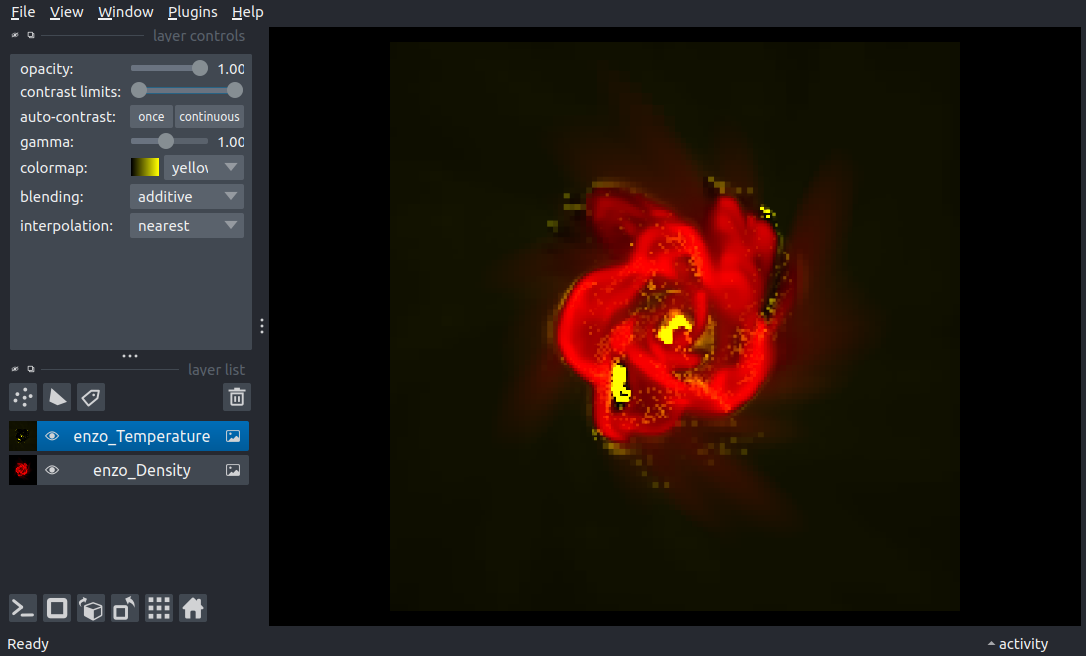

In [9]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

### variable resolution composites

You can also easily create composite images of different resolutions. 

In [10]:
viewer.layers.clear() # first clear existing layers

First, let's add a slice covering the whole domain:

In [11]:
yt_scene.add_slice(viewer, 
                   ds, 
                   'z', 
                   ('enzo', 'Density'), 
                   center = ds.domain_center,
                   resolution = (600, 600),
                   name = 'density_whole',
                   )

yt : [INFO     ] 2023-07-07 13:35:39,210 Making a fixed resolution buffer of (('enzo', 'Density')) 600 by 600


and zoom in:

In [12]:
viewer.camera.zoom = 10

and we see a pixelated view of the center of the density field:

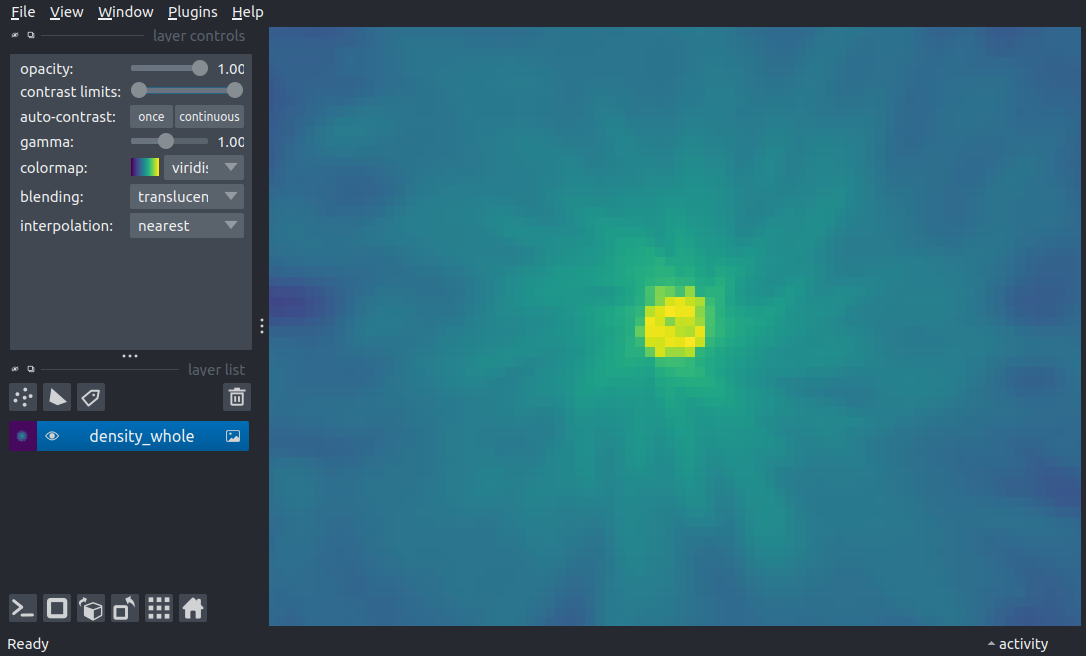

In [13]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

Now we can add a higher resolution slice just at the center:

In [14]:
yt_scene.add_slice(viewer, 
                   ds, 
                   'z', 
                   ('enzo', 'Density'), 
                   center = ds.domain_center,
                   resolution = (600, 600), 
                   width = ds.quan(25, 'kpc'),
                   height = ds.quan(25, 'kpc'), 
                   name = 'density_high_res'
                   )

and normalize the color limits across layers (without linking them):

In [15]:
yt_scene.normalize_color_limits(["density_whole", "density_high_res"], viewer.layers)

to create a composite image with higher resolution in the region of interest without requiring a high resolution across the whole domain:

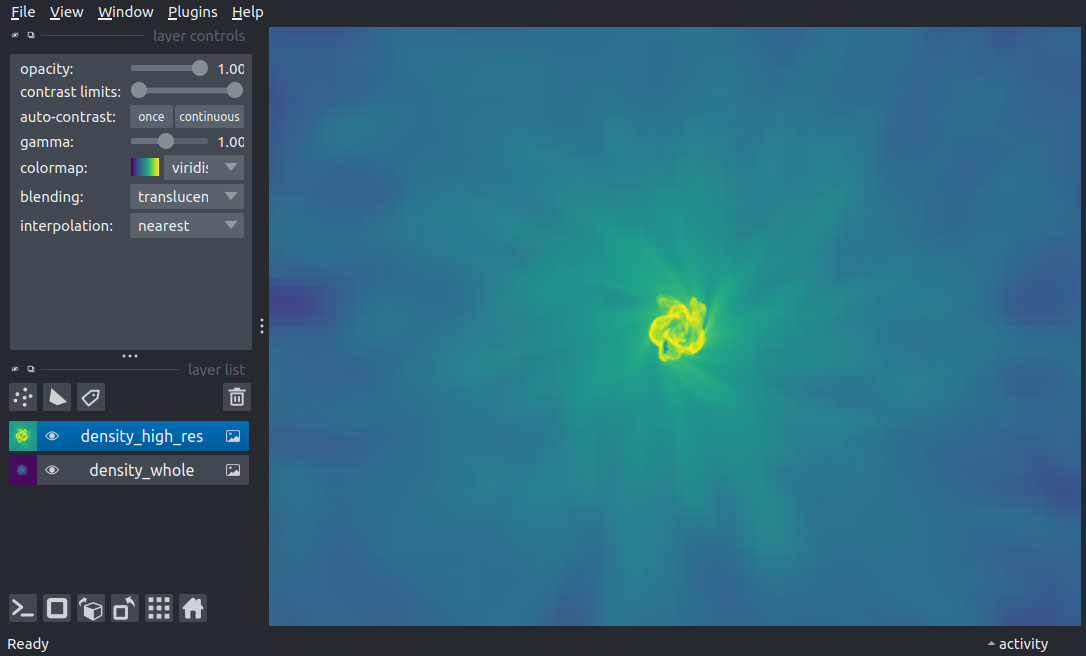

In [16]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

## Limitations

At present, `yt_napari` will not attempt to align slices along different axes, so if you add a second slice along a different axis, it will simply overlay as a new 2D image layer. You'll be able to work with the layers in napari, but compositing or 3D views is not recommended.

Further, 2d and 3d `yt_napari` image layers cannot presently mixed, so if you try to add a slice to an existing scene with a 3D region, `yt_napari` will error.